

Prediction of our code :
8.571381131441077


The real value :
8.0


MEA value:
0.5713811314410773


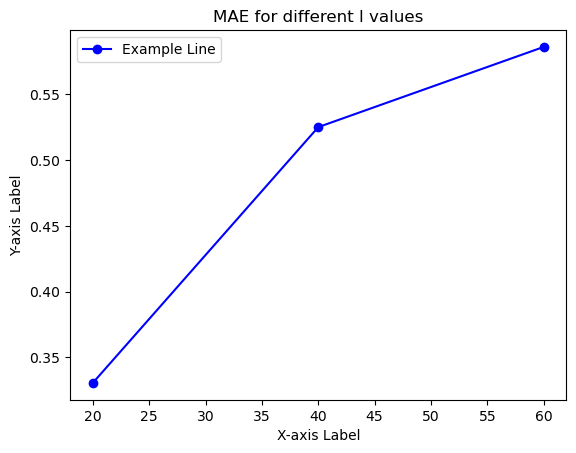

In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt

df = pd.read_json('new-extracted.json')

pivot_table = df.pivot_table(index='reviewer', columns='movie', values='rating', fill_value=0)

matrix = pivot_table.values

# Fill the zeros
def row_averages(matrix):
    row_avg = []
    for row in matrix:
        non_zero_values = row[row != 0]  # Extract non-zero values
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
        else:
            avg = 0  # If all values are zero, set average to 0
        row_avg.append(avg)
    return row_avg

row_averages_result = row_averages(matrix)

def column_averages(matrix):
    col_avg = []
    for col in range(matrix.shape[1]):
        non_zero_values = matrix[:, col][matrix[:, col] != 0]  # Extract non-zero values in column
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
        else:
            avg = 0  # If all values are zero, set average to 0
        col_avg.append(avg)
    return col_avg

column_averages_result = column_averages(matrix)
   
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i][j] == 0:
            matrix[i][j] = column_averages_result[j] - row_averages_result[i]

# SVD 

U, s, Vt = np.linalg.svd(matrix)

S = np.diag(s)

# Reduce k Decomposition

def reduce_svd(U, S, Vt, k):
    
    U_reduced = U[:, :k]
  
    S_reduced = np.diag(S[:k])
    
    Vt_reduced = Vt[:k, :]

    return U_reduced, S_reduced, Vt_reduced

# Reduce for k = 6
# L = 10

k = 6

U , S , Vt = reduce_svd(U, S, Vt, k)

S = np.diag(S)

R_matrix = np.dot(U, np.dot(S, Vt))

S2 = np.sqrt(S)

meta_matrix = np.dot(S2, Vt)

# Function for similartiy

def multiply_and_sum_columns(matrix, column1, column2):
   
    products = matrix[:, column1] * matrix[:, column2]
    
    total_sum = np.sum(products)
    return total_sum

# Similarity Function

def sim (matrix, movie):
    
    similarity = []
    for i in range(0, matrix.shape[1]):
        numerator = multiply_and_sum_columns(matrix, i, movie)
        denumerator = math.sqrt( multiply_and_sum_columns(matrix, i, i) * multiply_and_sum_columns(matrix, movie, movie))
        similarity.append(numerator/ denumerator)
    return similarity

# Prediction Generator

def closest_to_one_indices(array, l):
    diff_to_one = [(i, abs(value - 1)) for i, value in enumerate(array)]
    
    sorted_diff = sorted(diff_to_one, key=lambda x: x[1])
    
    closest_indices = [index for index, _ in sorted_diff[:l]]
    
    return closest_indices


def prediction_generaor(user, l, movie, meta_matrix, R_matrix, row_avg):
    numerator = 0
    denumerator = 0
    
    similarity = sim(meta_matrix, movie)
    
    
    closest_indices = closest_to_one_indices(similarity, l)
    
    for i in range(0, l):
        numerator = numerator + (similarity[closest_indices[i]] * (R_matrix[user][closest_indices[i]] + row_avg[user]))
        
        denumerator = denumerator + abs(similarity[closest_indices[i]])
            
    return numerator / denumerator


# Sample output for prediction

x = prediction_generaor(11, 100, 7, meta_matrix, R_matrix, row_averages_result)

print("\n")
print("Prediction of our code :")
print(x) 
print("\n")
print("The real value :")
print(matrix[76, 66])
print("\n")
print("MEA value:")
print(abs(x - matrix[76, 66]))


result_differnt_k = [0.9925, 0.8865, 0.3305, 0.5572, 0.8975]

k_values = [2, 4 ,6, 8, 12]

result_different_l = [0.3305, 0.5251, 0.5861]

l_values = [20, 40 , 60]


In [ ]:
#this code is the real project for implementing
#It same as first but this code use my SVD code to find eigenvalues
#My SVD function is below the file



import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt

df = pd.read_json('new-extracted.json')

pivot_table = df.pivot_table(index='reviewer', columns='movie', values='rating', fill_value=0)

matrix = pivot_table.values

# Fill the zeros
def row_averages(matrix):
    row_avg = []
    for row in matrix:
        non_zero_values = row[row != 0]  # Extract non-zero values
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
        else:
            avg = 0  # If all values are zero, set average to 0
        row_avg.append(avg)
    return row_avg

row_averages_result = row_averages(matrix)

def column_averages(matrix):
    col_avg = []
    for col in range(matrix.shape[1]):
        non_zero_values = matrix[:, col][matrix[:, col] != 0]  # Extract non-zero values in column
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
        else:
            avg = 0  # If all values are zero, set average to 0
        col_avg.append(avg)
    return col_avg

column_averages_result = column_averages(matrix)
   
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i][j] == 0:
            matrix[i][j] = column_averages_result[j] - row_averages_result[i]

# SVD 
def find_eigenvalues(matrix):
    
    Q, R = np.linalg.qr(matrix)
    X = Q
    
    for num in range(0,1000):
       
      matrix = np.dot(R, Q)
      Q, R = np.linalg.qr(matrix)
      X = np.dot(X, Q)
      
    S = np.diag(matrix)
    U = X 
    return S, U
   
def svd_function(matrix):
  
  MMt = np.dot(matrix, np.transpose(matrix))

  MtM = np.dot(np.transpose(matrix), matrix)

  S, U = find_eigenvalues(MMt)
  
  X, V = find_eigenvalues(MtM)
  
  S = np.sqrt(S)
  Vt = np.transpose(V)
  
  return U, S, Vt

U, S, Vt = svd_function(matrix)

# Reduce k Decomposition

def reduce_svd(U, S, Vt, k):
    
    U_reduced = U[:, :k]
  
    S_reduced = np.diag(S[:k])
    
    Vt_reduced = Vt[:k, :]

    return U_reduced, S_reduced, Vt_reduced

# Reduce for k = 6
# L = 10

k = 6

U , S , Vt = reduce_svd(U, S, Vt, k)

S = np.diag(S)

R_matrix = np.dot(U, np.dot(S, Vt))

S2 = np.sqrt(S)

meta_matrix = np.dot(S2, Vt)

# Function for similartiy

def multiply_and_sum_columns(matrix, column1, column2):
   
    products = matrix[:, column1] * matrix[:, column2]
    
    total_sum = np.sum(products)
    return total_sum

# Similarity Function

def sim (matrix, movie):
    
    similarity = []
    for i in range(0, matrix.shape[1]):
        numerator = multiply_and_sum_columns(matrix, i, movie)
        denumerator = math.sqrt( multiply_and_sum_columns(matrix, i, i) * multiply_and_sum_columns(matrix, movie, movie))
        similarity.append(numerator/ denumerator)
    return similarity

# Prediction Generator

def closest_to_one_indices(array, l):
    diff_to_one = [(i, abs(value - 1)) for i, value in enumerate(array)]
    
    sorted_diff = sorted(diff_to_one, key=lambda x: x[1])
    
    closest_indices = [index for index, _ in sorted_diff[:l]]
    
    return closest_indices


def prediction_generaor(user, l, movie, meta_matrix, R_matrix, row_avg):
    numerator = 0
    denumerator = 0
    
    similarity = sim(meta_matrix, movie)
    
    
    closest_indices = closest_to_one_indices(similarity, l)
    
    for i in range(0, l):
        numerator = numerator + (similarity[closest_indices[i]] * (R_matrix[user][closest_indices[i]] + row_avg[user]))
        
        denumerator = denumerator + abs(similarity[closest_indices[i]])
            
    return numerator / denumerator

#sample prediction
x = prediction_generaor(11, 20, 7, meta_matrix, R_matrix, row_averages_result)

print("\n")
print(x) 
print("\n")
print(matrix[76, 66])
print("\n")
print(abs(x - matrix[76, 66]))





In [28]:
import numpy as np

# Eigen values and eigen vectors finder 
# This method basicly used for finding U, S, Vt matrix for prediction
# Here is a sample matrix and if you run the code you will see the result of my code and the result of np.linalg.svd function. 

matrix =  [[82, 62, 61, 71, 79],
          [78, 77, 77, 88, 96], 
          [52, 96, 82, 50, 72],
          [99, 77, 89, 53, 78]]



def find_eigenvalues(matrix):
    
    Q, R = np.linalg.qr(matrix)
    X = Q
    
    for num in range(0,1000):
       
      matrix = np.dot(R, Q)
      Q, R = np.linalg.qr(matrix)
      X = np.dot(X, Q)
      
    S = np.diag(matrix)
    U = X 
    return S, U
   
def svd_function(matrix):
  
  MMt = np.dot(matrix, np.transpose(matrix))

  MtM = np.dot(np.transpose(matrix), matrix)

  S, U = find_eigenvalues(MMt)
  
  X, V = find_eigenvalues(MtM)
  
  S = np.sqrt(S)
  Vt = np.transpose(V)
  
  return U, S, Vt
  
U_theoric, S_theoric, Vt_theoric = svd_function(matrix)

print(U_theoric)
print("\n")
print(S_theoric)
print("\n")
print(Vt_theoric)
print("\n")

print("End of theoric computation\n")

U, S, Vt = np.linalg.svd(matrix)

print(U)
print("\n")
print(S)
print("\n")
print(Vt)
print("\n")


  

[[-0.46460221  0.47927395  0.03138841 -0.74394626]
 [-0.5435059   0.32149619  0.52700344  0.56877844]
 [-0.46405942 -0.8158705   0.26170199 -0.22475821]
 [-0.52287186 -0.03594461 -0.80795681  0.26929315]]


[341.36460725  41.75012291  32.29844817   5.3798142 ]


[[-0.45812085 -0.45542545 -0.45341302 -0.38589371 -0.47771919]
 [ 0.44055882 -0.63762952 -0.38585594  0.4699753   0.17197366]
 [ 0.70279236 -0.16830726  0.24628536 -0.58418499 -0.275367  ]
 [-0.30972827 -0.58922937  0.73462286  0.04961961  0.12142607]
 [-0.07864159 -0.10245818 -0.21261375 -0.53523365  0.80724108]]


End of theoric computation

[[-0.46460221  0.47927395 -0.03138841 -0.74394626]
 [-0.5435059   0.32149619 -0.52700344  0.56877844]
 [-0.46405942 -0.8158705  -0.26170199 -0.22475821]
 [-0.52287186 -0.03594461  0.80795681  0.26929315]]


[341.36460725  41.75012291  32.29844817   5.3798142 ]


[[-0.45812085 -0.45542545 -0.45341302 -0.38589371 -0.47771919]
 [ 0.44055882 -0.63762952 -0.38585594  0.4699753   0.17197366]
 [